# Formation DSA

TD Antoine LY : analyse de sentiments

L'objectif est de vous faire approfondir une notion de machine learning aux travers d'une compétition Kaggle. Kaggle est aujourd'hui un site de compétition incontournable dans le monde du machine learning. Même si la plateforme n'est pas représentative des enjeux opérationnels, elle est néanmoins représentative des sujets d'attention de la communauté scientifique et demeure un bon outil d'apprentissage est de partage.


Le projet consiste donc à utiliser le challenge [Tweet sentiment extraction](https://www.kaggle.com/c/tweet-sentiment-extraction/overview/description) à des fins académiques.


### Les données

Les données sont celles proposées par le challenge. Elles composent de deux fichiers:

* `train.csv` ce document comportent les données à utiliser pour calibrer votre modèle. Il comporte toutes les colonnes
* `test.csv` ce document n'est utilisé **que** pour évaluer la performance finale de votre modèle. En aucun cas il ne peut être utilisé pour fine-tuner ou calibrer votre modèle. Il simule les données qui ne sont normalement JAMAIS accessible sur Kaggle (ni dans la vraie vie). à considérer comme un nouvel échantillon.

### Le challenge

Prédire la colonne `sentiment` à partir de la colonne `text`.

## 1) Import du fichier train

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
commentaires = pd.read_csv("./data/raw/train.csv")

In [13]:
commentaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [17]:
commentaires.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

27481 lignes, 1 champ `text` est vide

In [6]:
commentaires.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [14]:
commentaires.tail(5)

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


Le fichier semble entièrement rédigé en anglais.

## 2) EDA

inspiration : https://www.youtube.com/watch?v=VraAbgAoYSk

autre source : https://www.kaggle.com/rajgandhi/eda-tweet-extraction

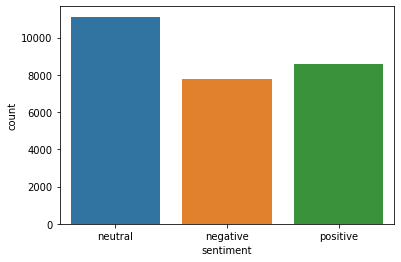

In [25]:
# Analyser un déséquilibre dans les données
sns.countplot(x=commentaires["sentiment"]);